# Python S9 Seaborn

## My Course Notes and Code

These are my notes from the Jose Portilla's Udemy course available [here](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

I'm focusing on the section 9 of the course, which deals with **Seaborn**.

_____
### S9V47 Intro to Seaborn

- Statistical plotting library
    - Built on top of **Matplotlib**
- Beautiful default styles
- Designed to work well with **Pandas** DataFrame objects

**Useful resources**:

https://seaborn.pydata.org/examples/index.html

https://seaborn.pydata.org/api.html

_____
### S9V48 Distribution Plots

In [7]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

tips = sns.load_dataset('tips') # one of sns built-in datasets
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Histogram

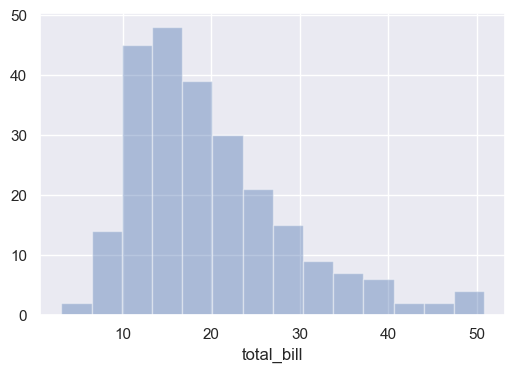

In [88]:
sns.set_style("darkgrid")                                # nice, ggplot2-like :)

# from IPython.display import set_matplotlib_formats       # Change the default image format to a vector format
# set_matplotlib_formats('svg')                            # https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})          # https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/
sns.set_context('notebook')

sns.distplot(tips['total_bill'], kde = False) # removing KDE - kernel density estimation

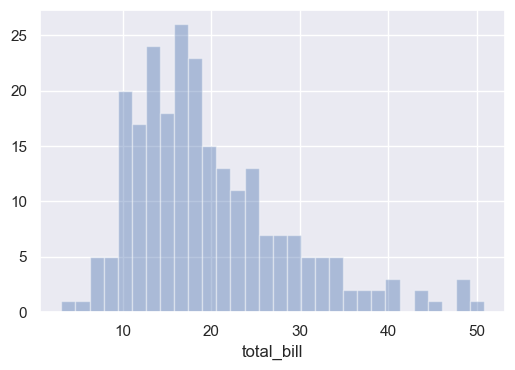

In [9]:
sns.distplot(tips['total_bill'], kde = False, bins = 30)

#### Joint Plot

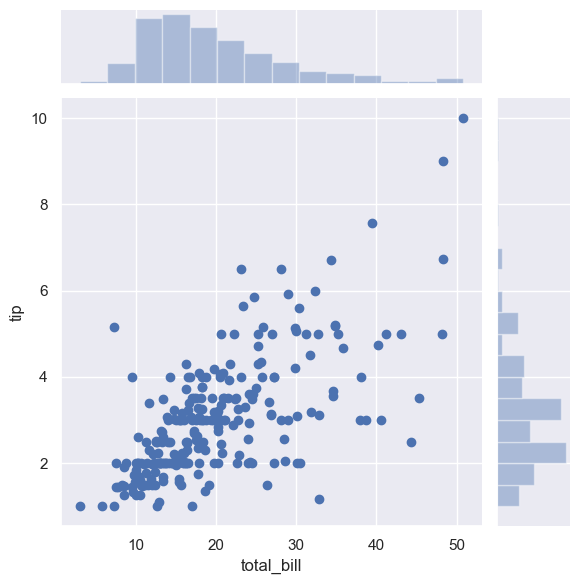

In [10]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips) # `kind = 'scatter'`

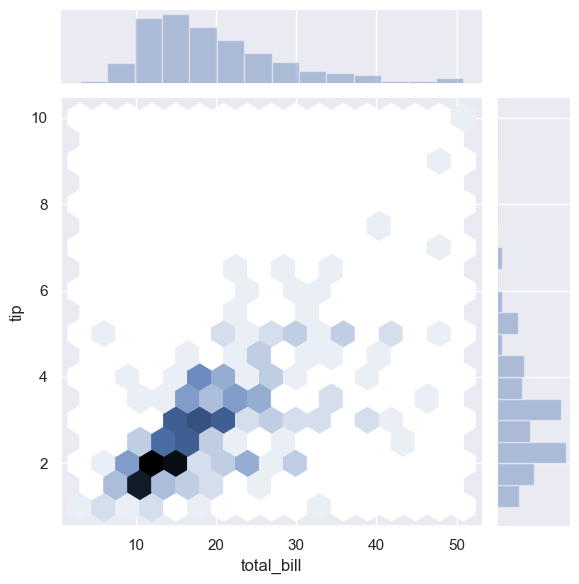

In [11]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


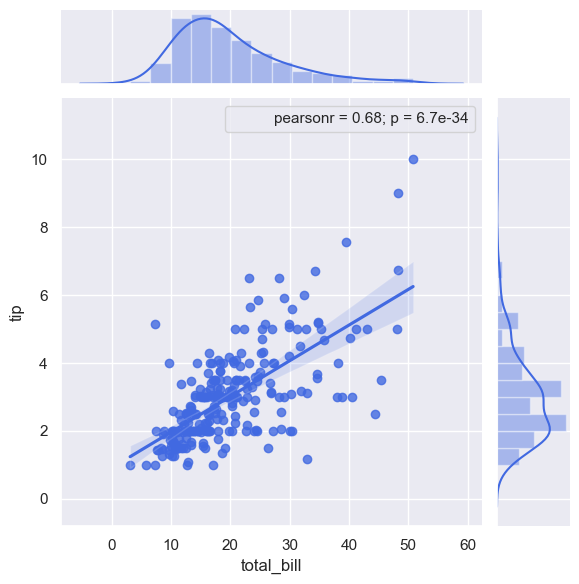

In [12]:
pl = sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg',  color='royalblue')
pl.annotate(stats.pearsonr)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


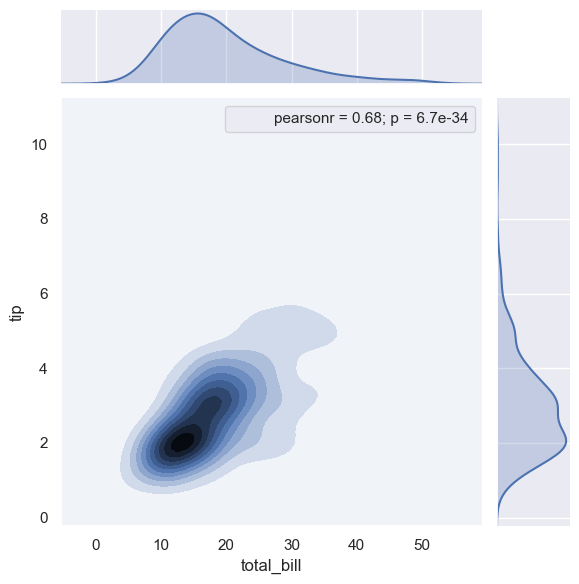

In [13]:
pl = sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')
pl.annotate(stats.pearsonr)


#### Pairplot

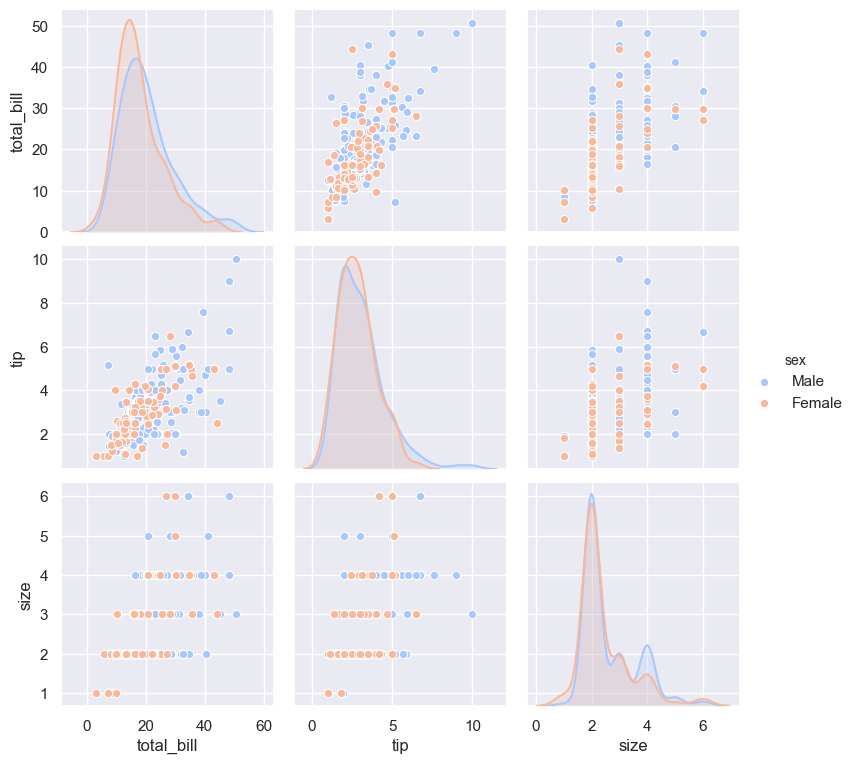

In [14]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

#### Rugplot

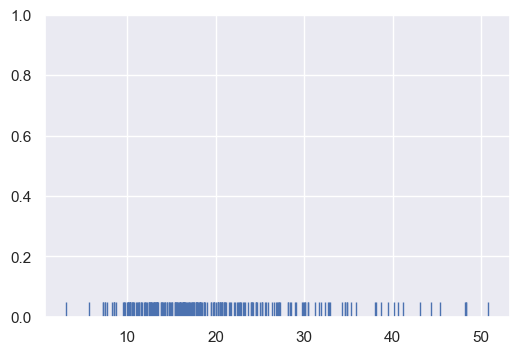

In [15]:
sns.rugplot(tips['total_bill'])

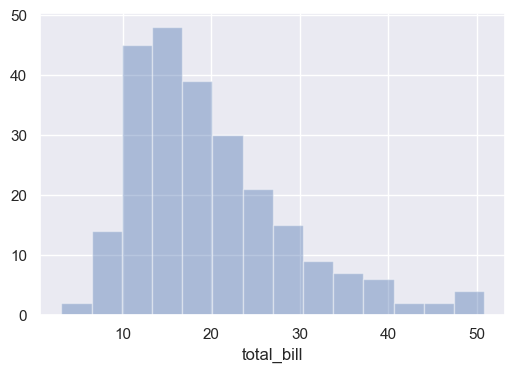

In [16]:
sns.distplot(tips['total_bill'], kde = False)

#### Kernel Density Estimation (KDE) plots

KDE plots replaces every single observation with a Gaussian (Normal) distribution centered around that value. Then, the final line is obtained by summing up these distributions centered around each datapoint.
-  One does not need to use Gaussian kernels for plotting KDE plots. 
    - Gaussian kernel is Seaborne's default
- Triangular kernel...
- Cosine kernel...

Great [Youtube link](https://youtu.be/DCgPRaIDYXA) for understanding how it words.

Kernel Density Estimation is estimating the probability density function. 

The area under the curve is 1, and the probability of a value being between x1 and x2 is the area under the curve between those two points.

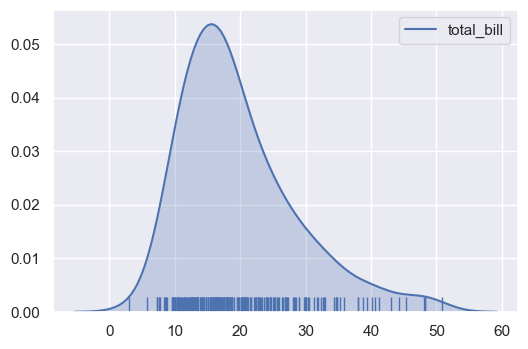

In [17]:
sns.kdeplot(tips['total_bill'], shade = True)
sns.rugplot(tips['total_bill'])

- Lower bw -> higher variance of the KDE
- Higher bw -> lower variance of the KDE

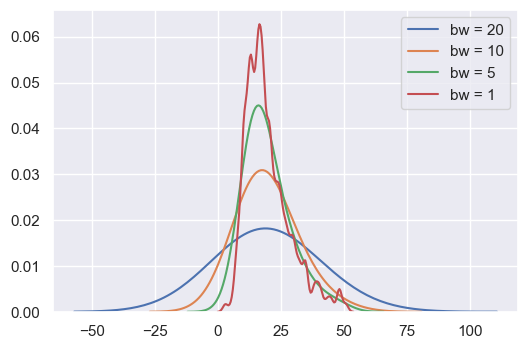

In [18]:
sns.kdeplot(tips['total_bill'], bw = 20, label = 'bw = 20')
sns.kdeplot(tips['total_bill'], bw = 10, label = 'bw = 10')
sns.kdeplot(tips['total_bill'], bw = 5, label = 'bw = 5')
sns.kdeplot(tips['total_bill'], bw = 1, label = 'bw = 1')

In [19]:
# Understanding KDE plots step-by-step

dataset = np.random.randn(25) # Create dataset
dataset

array([ 1.10723107, -1.09808459,  1.07673237,  0.72023629, -0.52921332,
       -0.35792173, -0.83691184,  1.21542695, -0.70616074, -0.11552448,
        1.64951131,  0.34298163,  0.95598302, -0.11783355, -1.46712243,
        1.90631882, -0.81426121, -1.44255597,  1.16380332,  1.28301443,
       -0.37582145,  1.00921485, -0.22636988, -1.45837864,  0.91050136])

In [20]:
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

[Silverman Bandwidth Estimation method](https://en.wikipedia.org/wiki/Kernel_density_estimation#Bandwidth_selection):

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1538fbae068efc2dc9ca34513760df51e492c28)

(0, 1)

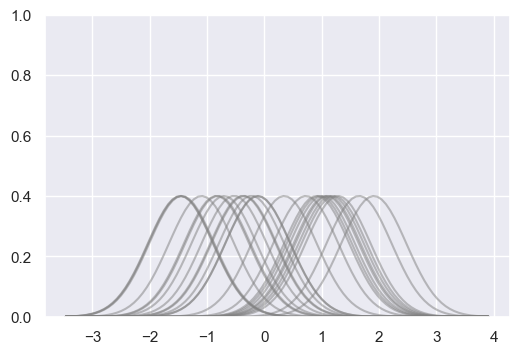

In [21]:
# Set up the bandwidth, using the Silverman method:

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list # I don't really understand this code
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis) # Probability Distribution Function
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)

plt.ylim(0, 1)

I should check these two links:

https://www.youtube.com/watch?v=uial-2girHQ&ab_channel=DataDaft

https://youtu.be/YXLVjCKVP7U

Text(0.5, 0.98, 'Sum of the Basis Functions')

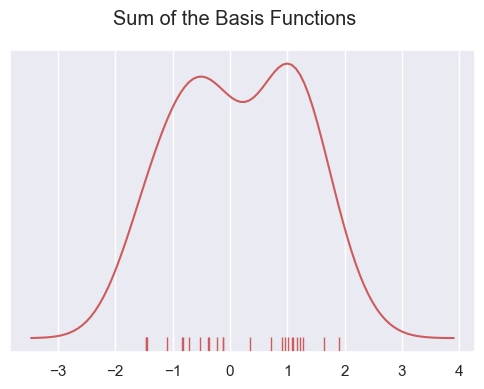

In [22]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis = 0)

# Plot figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# Add the initial rugplot
sns.rugplot(dataset, c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

#### Bivariate KDE plots

This is based on the forementioned [Youtube video](https://youtu.be/DCgPRaIDYXA).

In [23]:
cars = sns.load_dataset('mpg').dropna()
cars.info() # also useful: `cars.shape`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [24]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


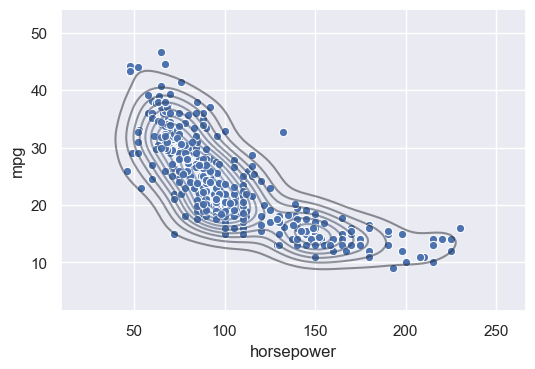

In [25]:
sns.scatterplot(cars['horsepower'], cars['mpg'])
sns.kdeplot(cars['horsepower'], cars['mpg'], alpha = 0.5)

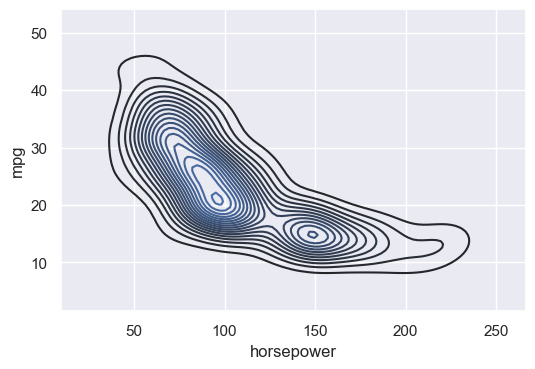

In [26]:
sns.kdeplot(cars['horsepower'], cars['mpg'], n_levels = 20)

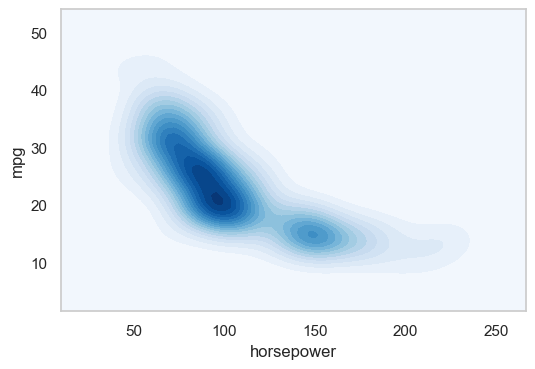

In [27]:
sns.set_style("whitegrid") 
sns.kdeplot(cars['horsepower'], cars['mpg'], 
    n_levels = 20, 
    cmap= 'Blues',
    shade = True)

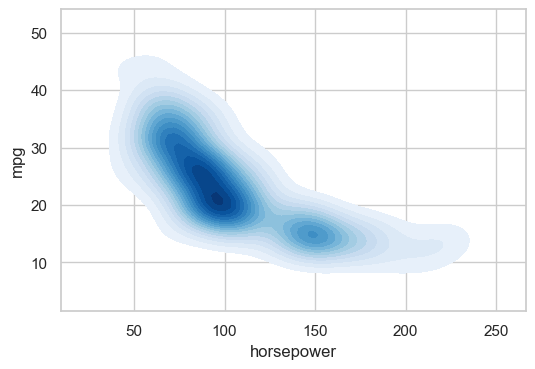

In [28]:
sns.set_style("whitegrid") 
sns.kdeplot(cars['horsepower'], cars['mpg'], 
    n_levels = 20, 
    cmap= 'Blues',
    shade = True, 
    shade_lowest = False)

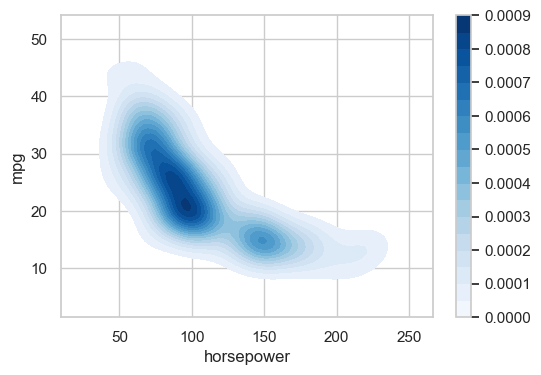

In [29]:
sns.kdeplot(cars['horsepower'], cars['mpg'], 
    n_levels = 20, 
    cmap = 'Blues',
    shade = True, 
    shade_lowest = False, 
    cbar = True)

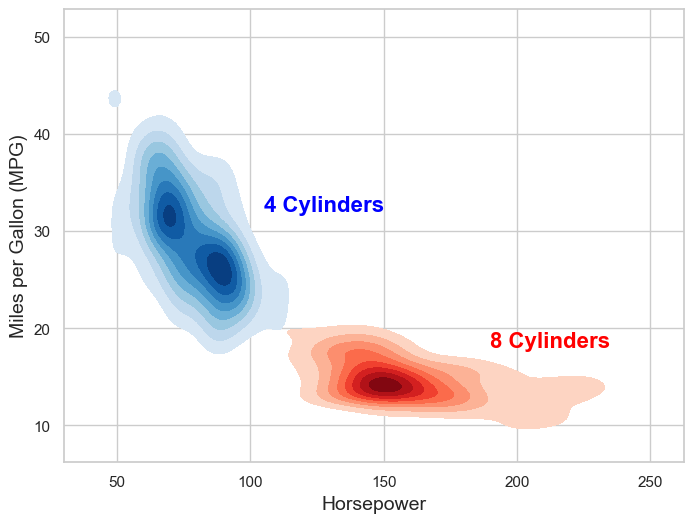

In [30]:
cyl_4 = cars[cars.cylinders == 4]
cyl_8 = cars[cars.cylinders == 8]

plt.figure(figsize = (8, 6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade = True, shade_lowest = False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize = 14)
plt.ylabel('Miles per Gallon (MPG)', fontsize = 14)

# plt.annotate(): (s: str, xy: Tuple[float, float], *args: Any, **kwargs: Any)
# In order to understand this function better, I wrote some code in the next cell

plt.annotate("4 Cylinders", (105, 32), color = 'blue', fontsize = 16, fontweight = 'bold') 
plt.annotate("8 Cylinders", (190, 18), color = 'red', fontsize = 16, fontweight = 'bold');

Text(1, 1, '1, 1')

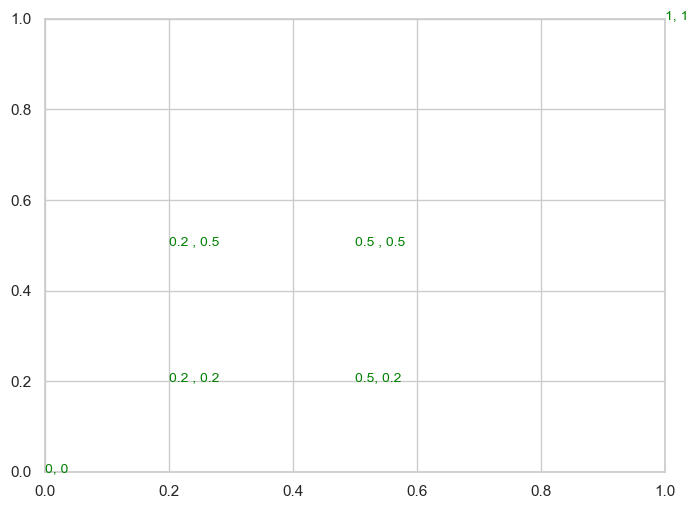

In [31]:
plt.figure(figsize = (8, 6))
plt.annotate('0, 0', (0, 0), color = 'green', fontsize = 10)
plt.annotate('0.2 , 0.2', (0.2 , 0.2), color = 'green', fontsize = 10) 
plt.annotate('0.5 , 0.5', (0.5 , 0.5), color = 'green', fontsize = 10) 
plt.annotate('0.2 , 0.5', (0.2 , 0.5), color = 'green', fontsize = 10) 
plt.annotate('0.5, 0.2', (0.5 , 0.2), color = 'green', fontsize = 10) 
plt.annotate('1, 1', (1, 1), color = 'green', fontsize = 10)

# Since this plot ranges from 0 to 1 on both the X and the Y axis, we locate annotations by 
# referring to coordinates that lie between 0 and 1

_____
### S9V49 Categorical Plots

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Bar Plot

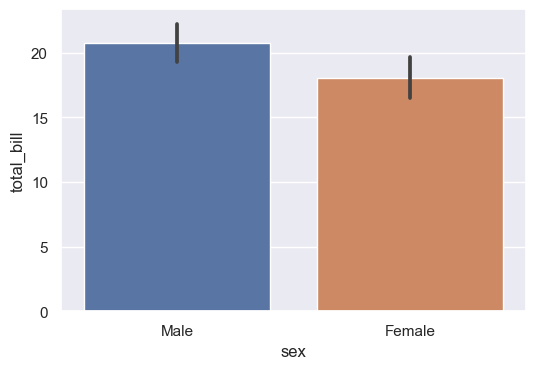

In [33]:
sns.set_style('darkgrid')

sns.barplot(tips['sex'], tips['total_bill']) # by default, we're looking at mean total_bill per gender

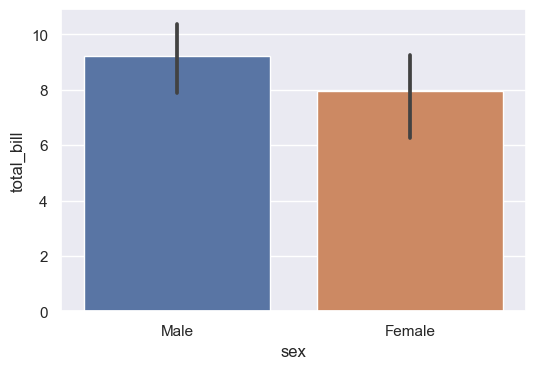

In [34]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

#### Count Plot

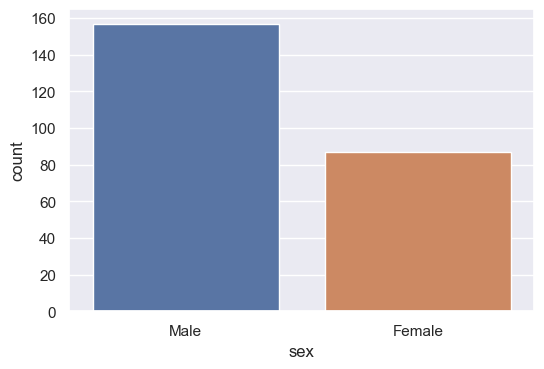

In [35]:
sns.countplot(x = 'sex', data = tips)

#### Boxplots

A [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

- **Minimum** (Q0 or 0th percentile): the lowest data point in the data set *excluding any outliers*
- **Maximum** (Q4 or 100th percentile): the highest data point in the data set *excluding any outliers*
- **Median** (Q2 or 50th percentile): the middle value in the data set
- **First quartile** (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.
- **Third quartile** (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset.[7]

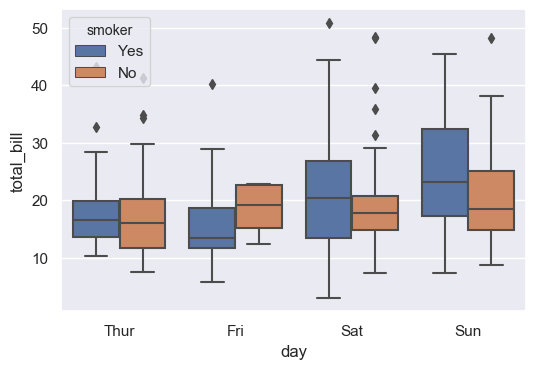

In [36]:
sns.boxplot('day', 'total_bill', hue = 'smoker', data = tips) # `hue` is, of course, optional


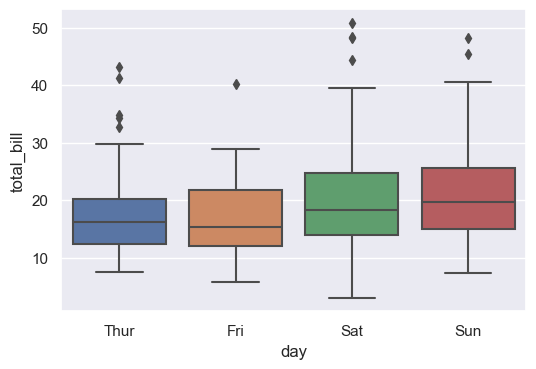

In [37]:
sns.boxplot('day', 'total_bill', data = tips)

In [38]:
inf = tips[tips['day'] == 'Thur']['total_bill'].describe()
inf

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: total_bill, dtype: float64

In [39]:
IQR = inf['75%'] - inf['25%']

# useful guide for printing: https://www.delftstack.com/howto/python/python-print-string-and-variable/

print(f"IQR is: {IQR}\n1.5 * IQR = {1.5 * IQR}\n3Q + (1.5 * IQR) = {inf['75%'] + (1.5 * IQR)}")

IQR is: 7.712500000000002
1.5 * IQR = 11.568750000000003
3Q + (1.5 * IQR) = 31.723750000000003


- In this case, the **maximum** value in this data set is $43.1.

- 1.5 IQR above the third quartile is $31.72. 

The maximum is greater than 1.5 IQR plus the third quartile, so the maximum is an outlier. 

Therefore, the upper whisker is drawn at the greatest value smaller than 1.5 IQR above the third quartile.

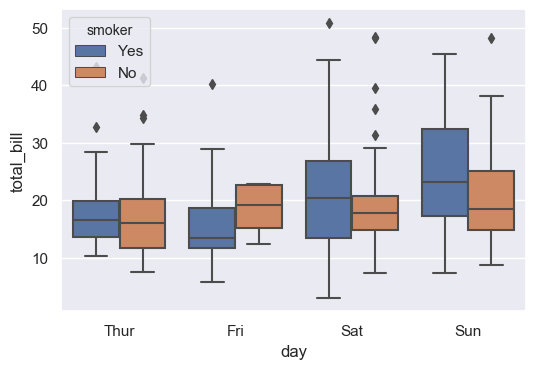

In [40]:
sns.boxplot('day', 'total_bill', hue = 'smoker', data = tips)

#### Violin-plots

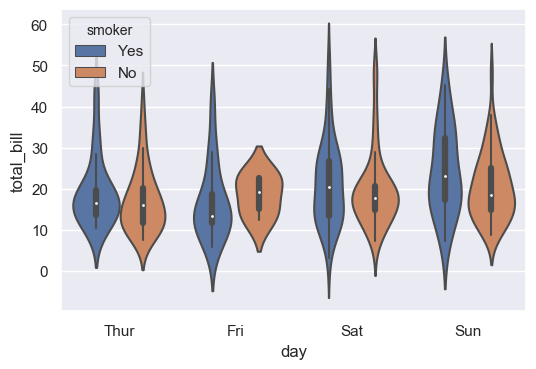

In [41]:
sns.violinplot('day', 'total_bill', hue = 'smoker', data = tips)

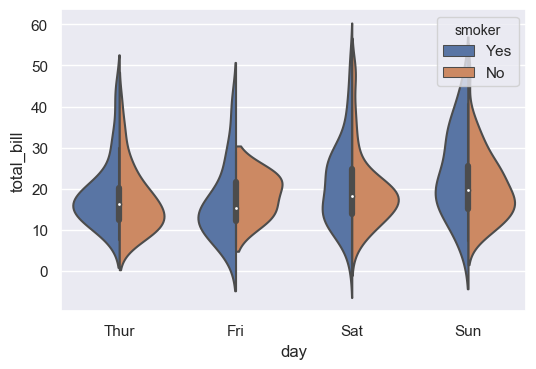

In [42]:
sns.violinplot('day', 'total_bill', data = tips, hue = 'smoker', split = True)

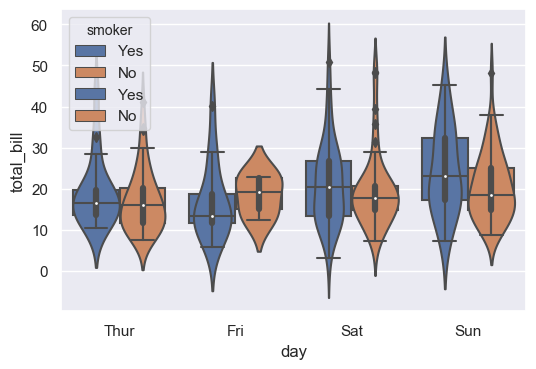

In [43]:
sns.boxplot('day', 'total_bill', hue = 'smoker', data = tips)
sns.violinplot('day', 'total_bill', hue = 'smoker', data = tips)

#### Strip-plot

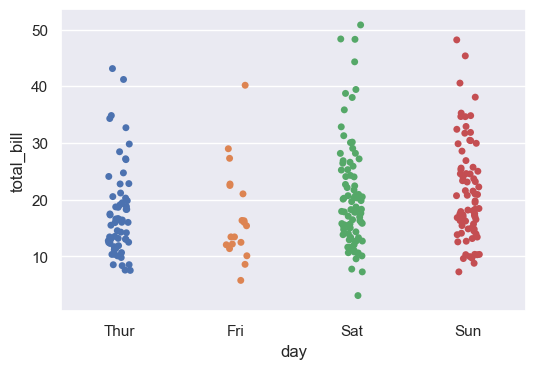

In [44]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips) # default: `jitter = True`

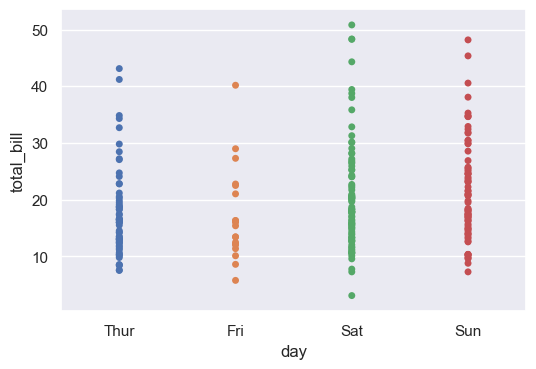

In [45]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

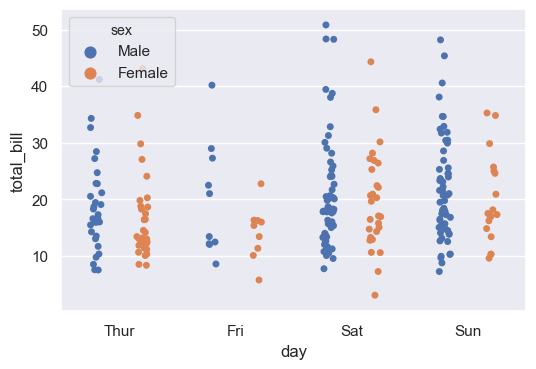

In [46]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', dodge = True)
# The `split` parameter has been renamed to `dodge`.

#### Swarm-plot

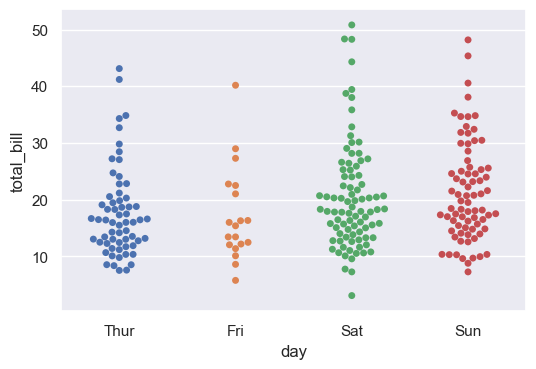

In [47]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

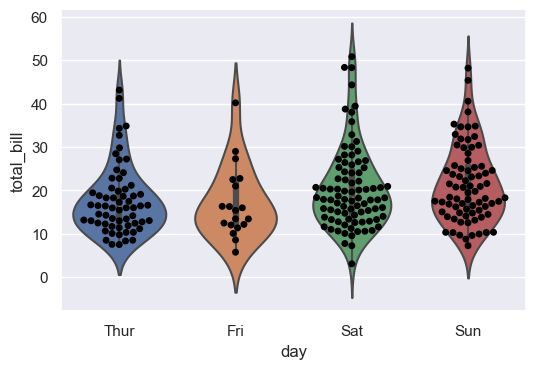

In [48]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

#### `catplot` - the most general method for plotting categorical data

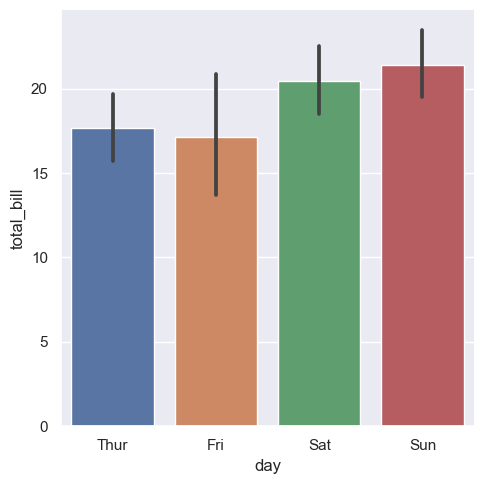

In [49]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

_____
### S9V50 - Matrix Plots
#### Heatmap

In [58]:
# tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [60]:
tc = tips.corr()

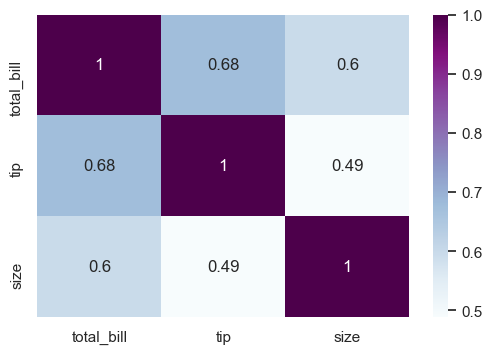

In [78]:
sns.heatmap(tc, cmap = 'BuPu', annot = True) # https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

In [64]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [66]:
fp = flights.pivot(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


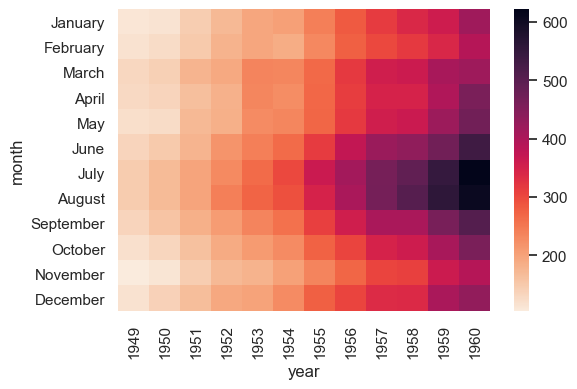

In [70]:
cmap = sns.cm.rocket_r          # reversing the color scheme
sns.heatmap(fp, cmap = cmap)    # https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbar

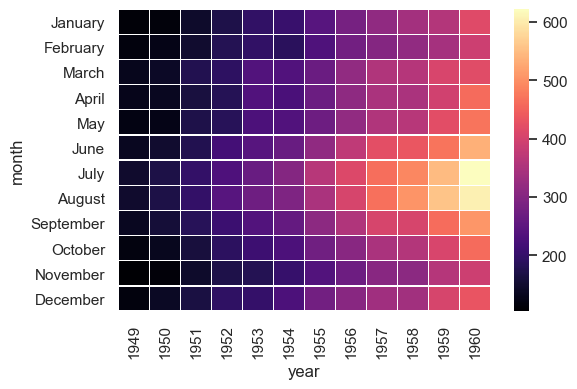

In [82]:
sns.heatmap(fp, cmap = 'magma', linecolor = 'white', linewidths = '0.3')

#### Cluster-map

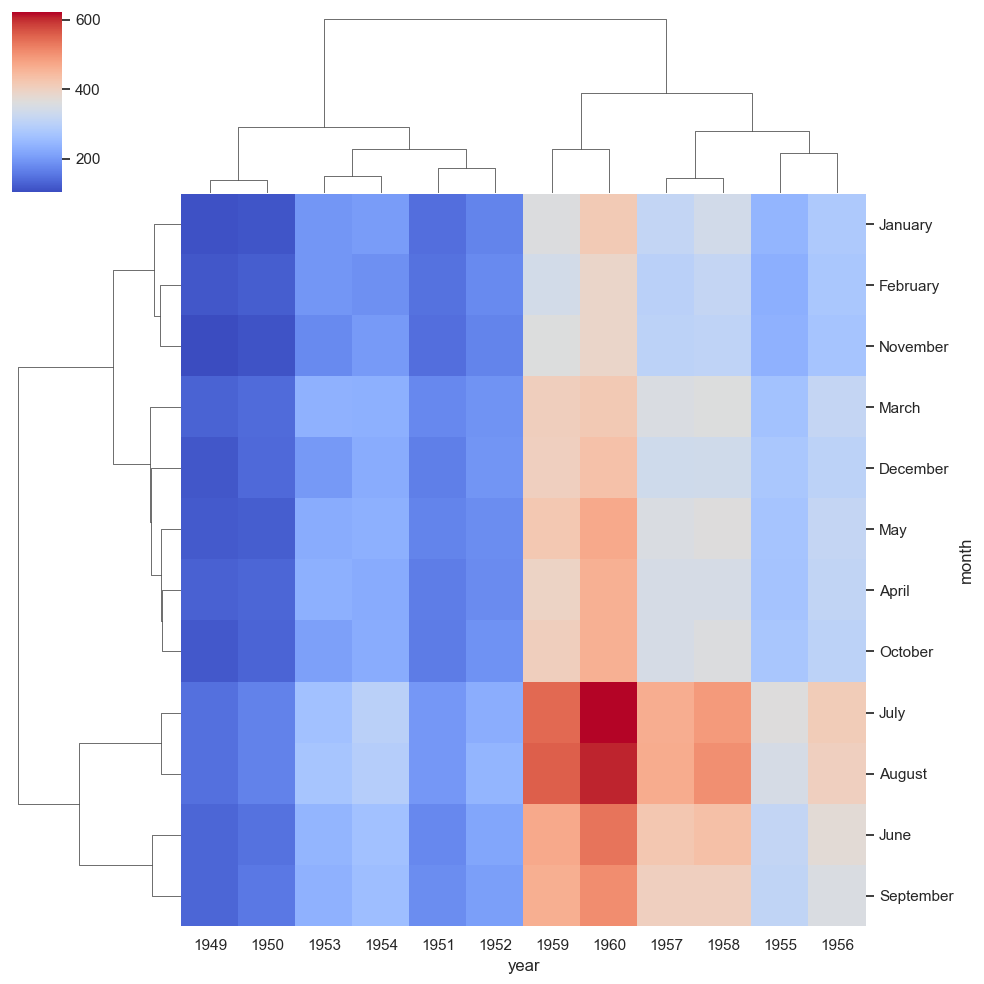

In [89]:
sns.clustermap(fp, cmap = 'coolwarm')

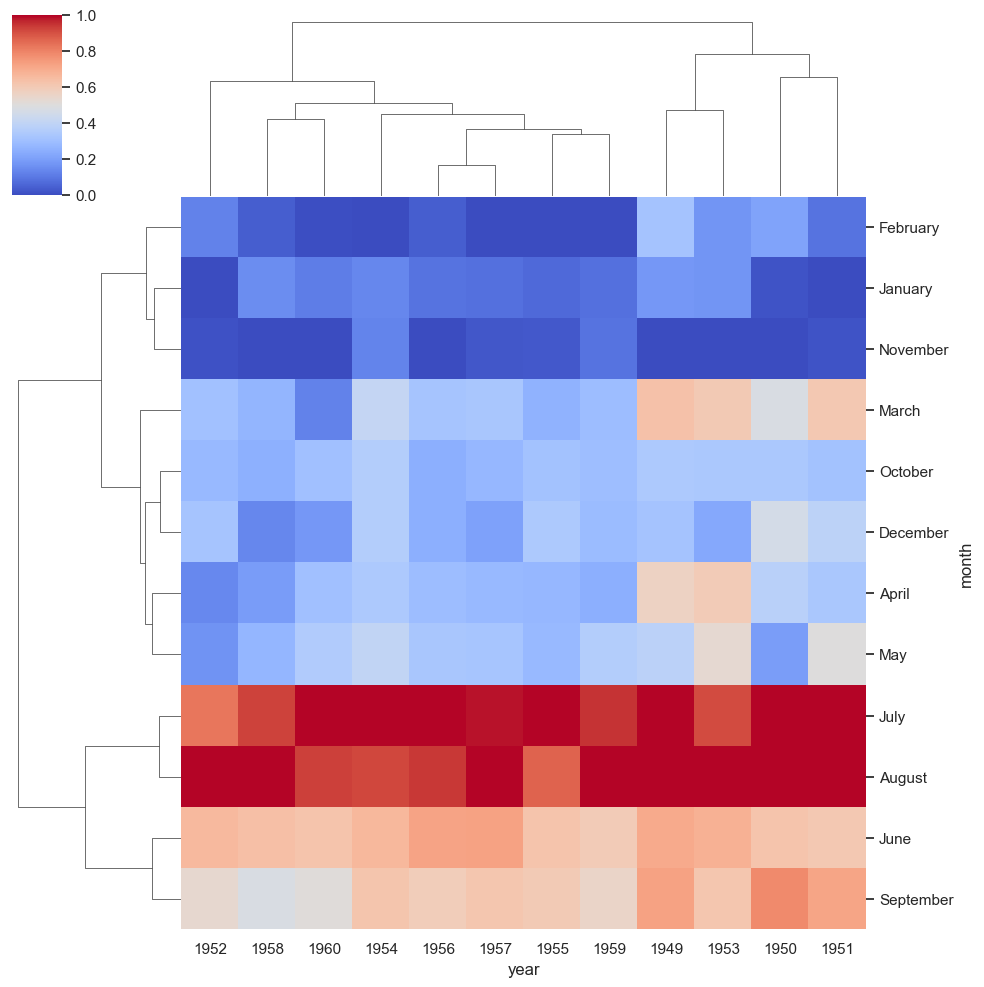

In [85]:
sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

_____
### S9V51 Grids
#### `sns.PairGrid`

In [87]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [90]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

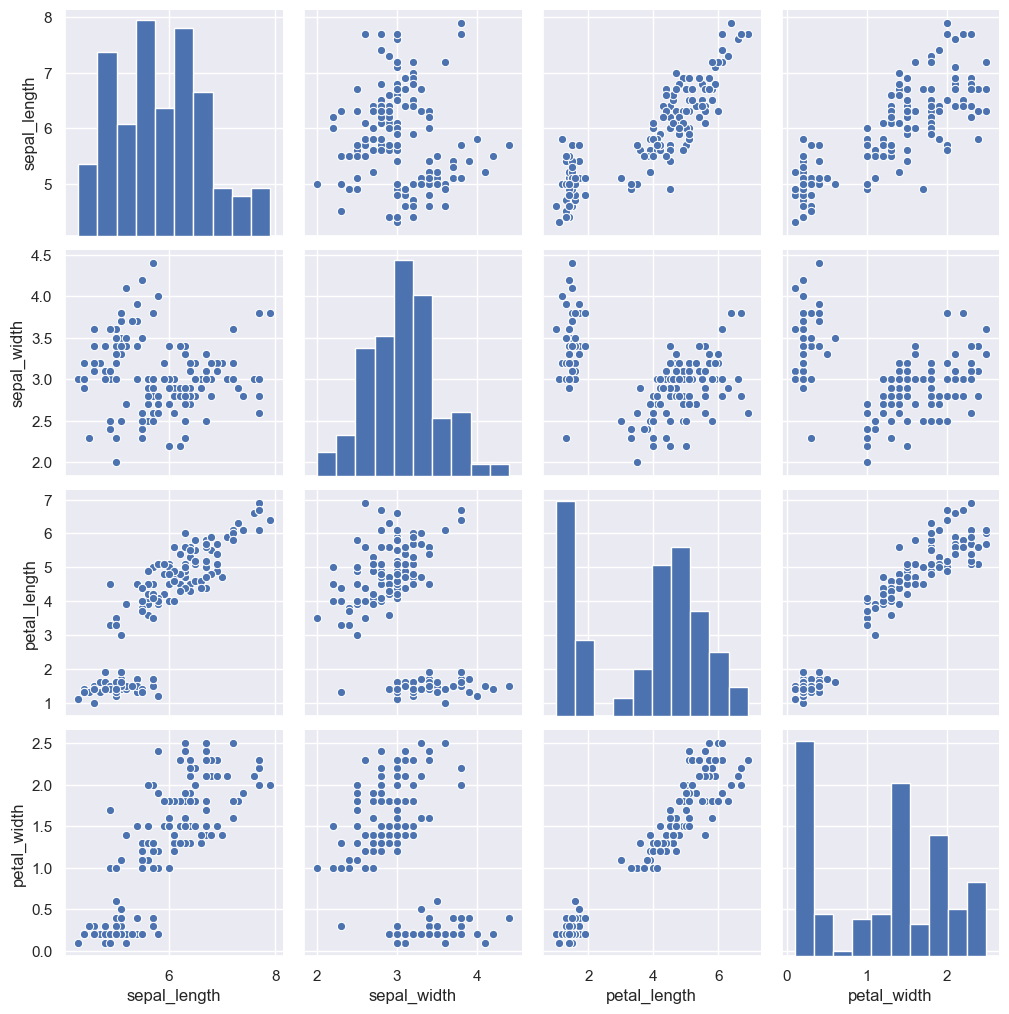

In [91]:
sns.pairplot(iris)

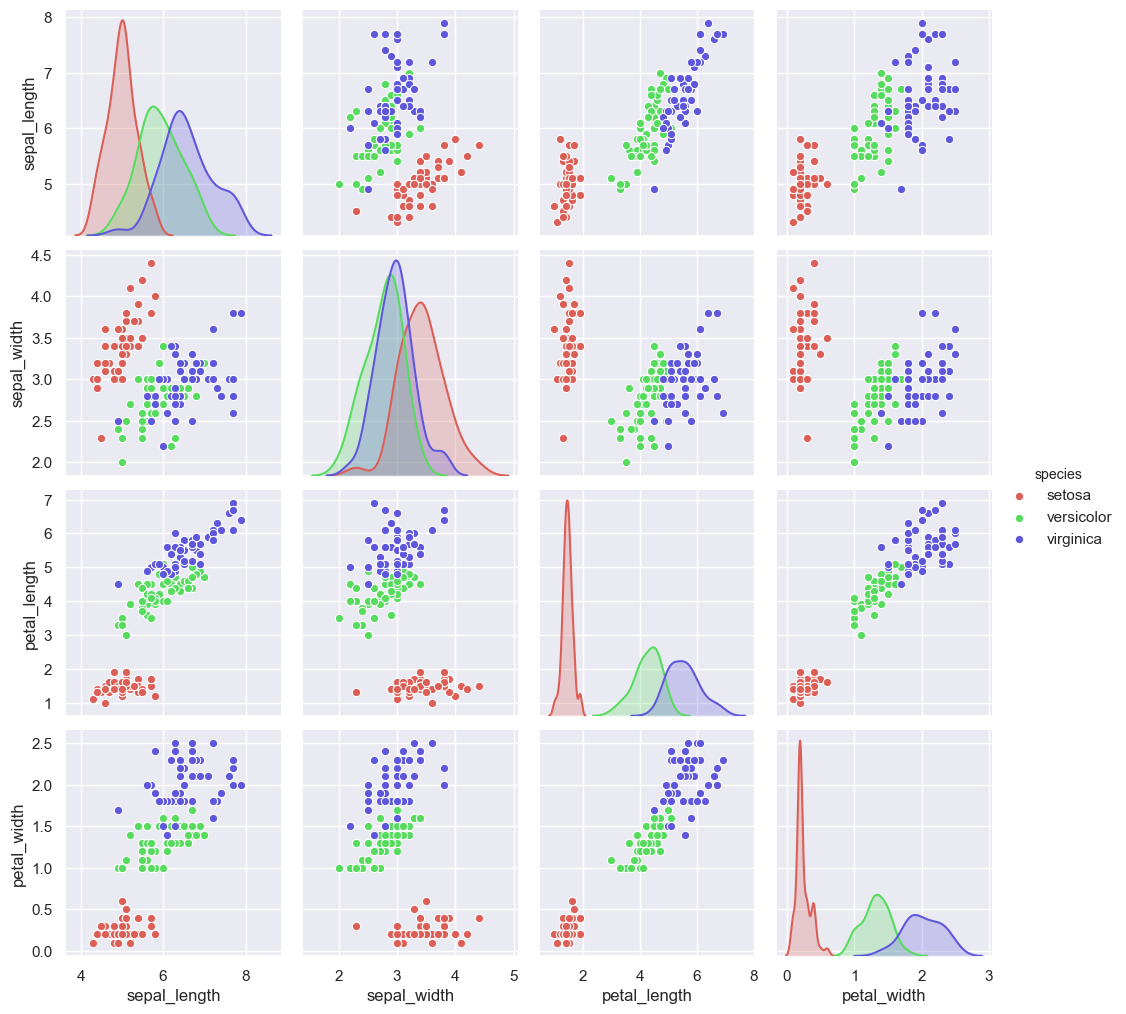

In [113]:
sns.pairplot(iris, hue = 'species', palette = 'hls') # https://seaborn.pydata.org/tutorial/color_palettes.html

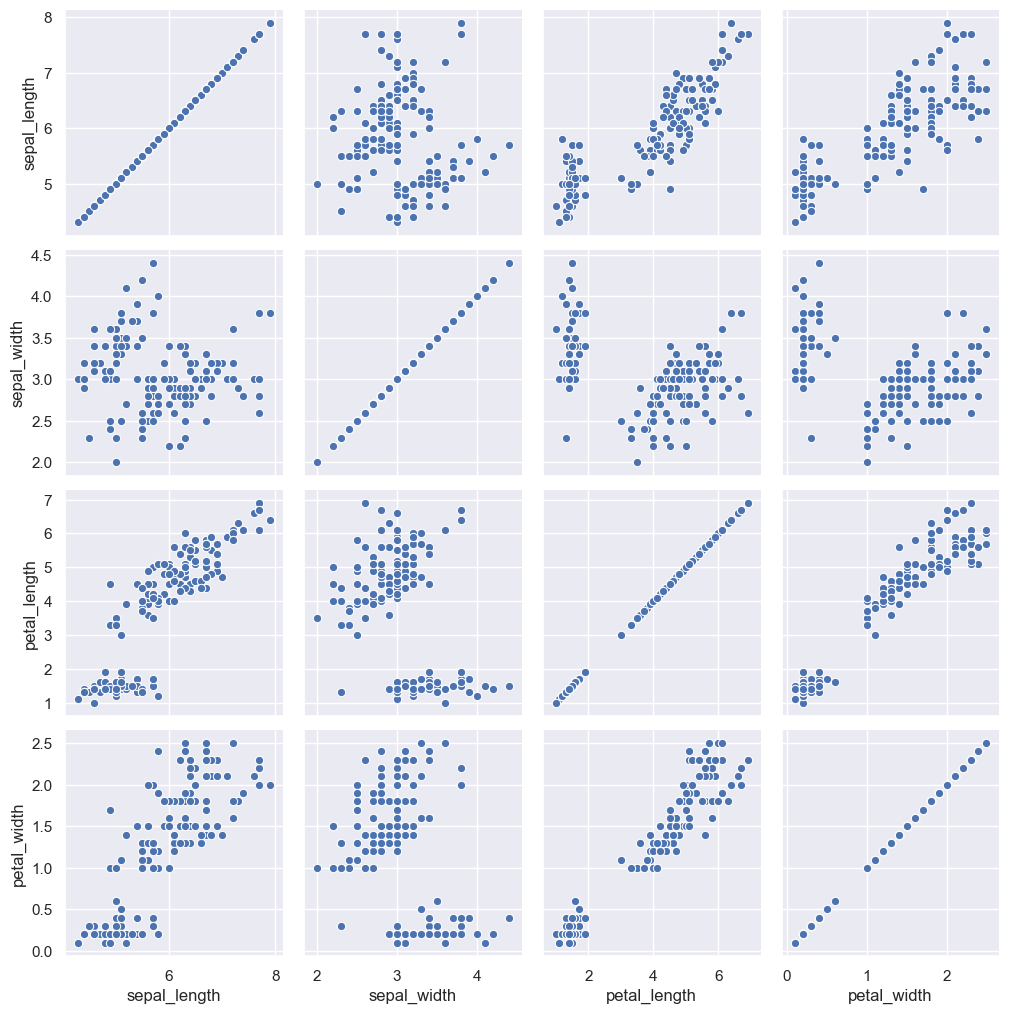

In [97]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

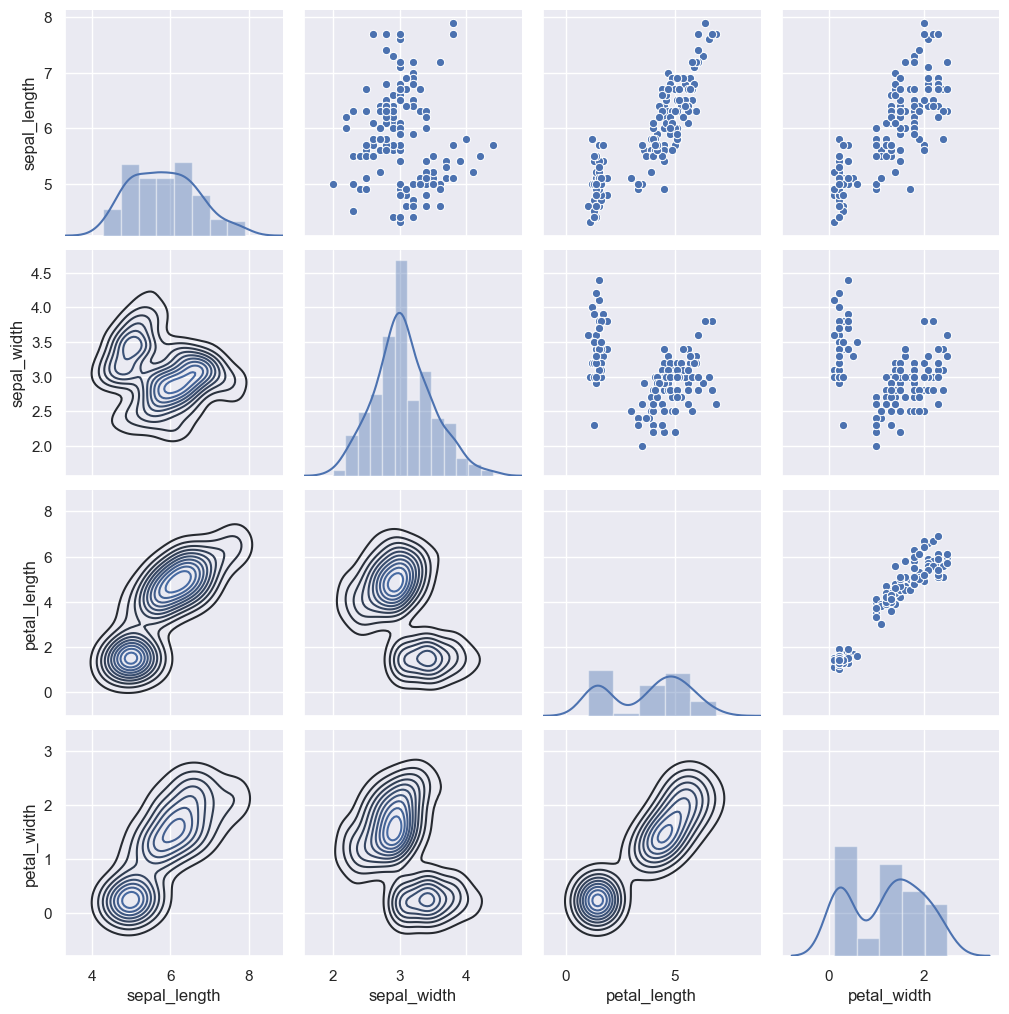

In [96]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

#### `sns.FacetGrid`

In [99]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


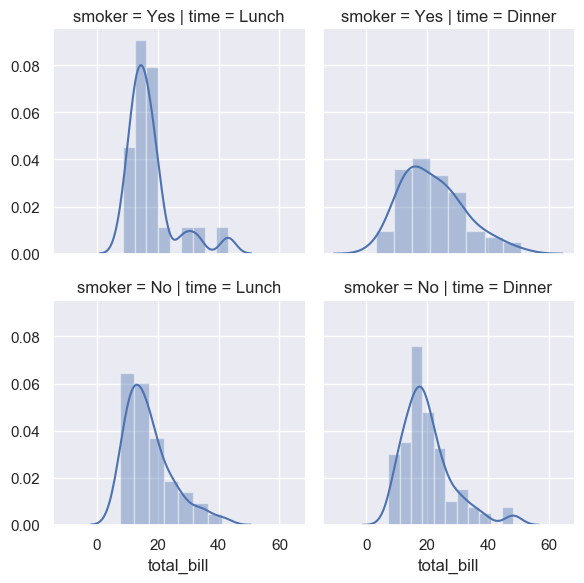

In [102]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot, 'total_bill')

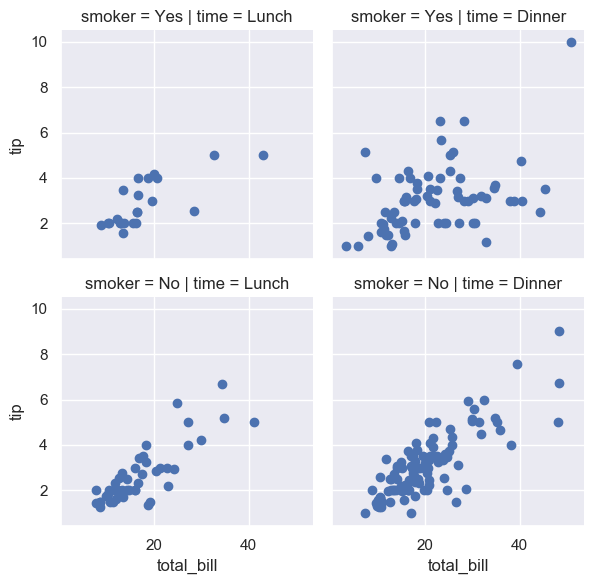

In [104]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip').add_legend()

#### `sns.JointGrid`

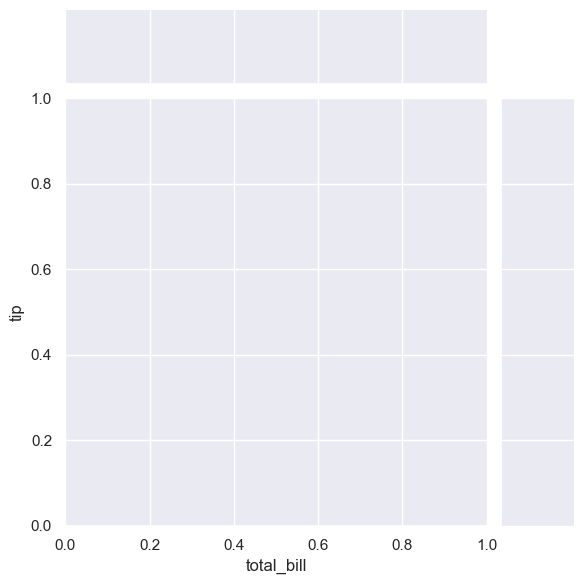

In [106]:
g = sns.JointGrid(x= 'total_bill', y = 'tip', data = tips)

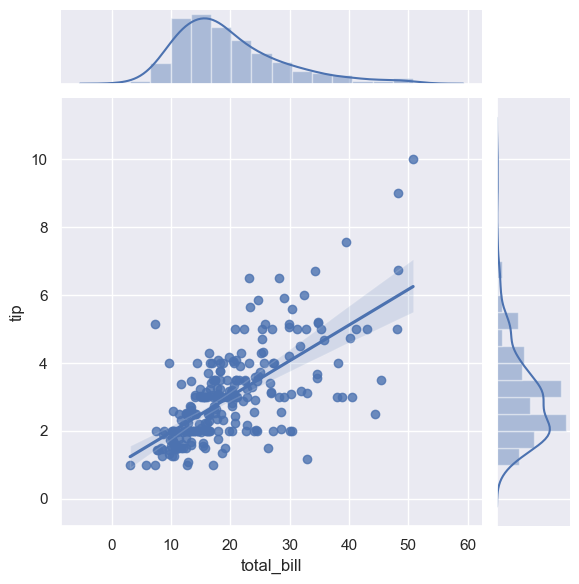

In [107]:
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
g = g.plot(sns.regplot, sns.distplot)

### S9V52 Regression Plots

In [114]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


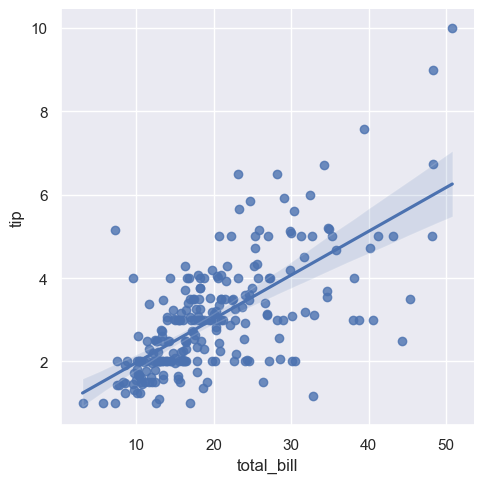

In [116]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

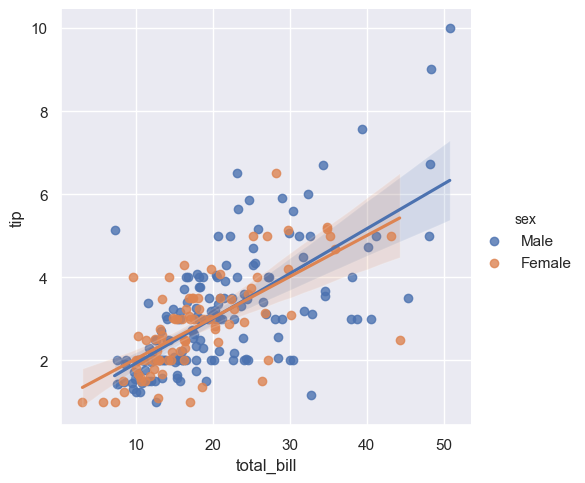

In [117]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

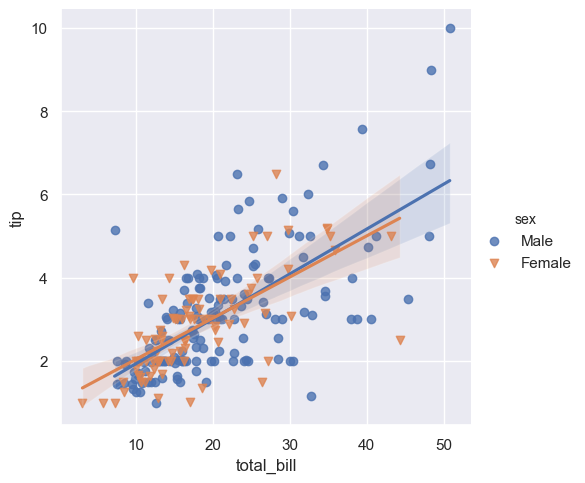

In [118]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v']) # matplotlib

To be continued...